In [22]:
import pandas as pd
import numpy as np
import sklearn as sk
import pydotplus
from IPython.display import Image

In [23]:
data = pd.read_csv("Covid Data.csv")
data = data.drop(columns = ['PREGNANT'])

data.loc[data['DATE_DIED']=='9999-99-99', ['DATE_DIED']] = '2'
data.loc[data['DATE_DIED']!='9999-99-99', ['DATE_DIED']] = '1'
data.loc[data['CLASIFFICATION_FINAL']<4, ['CLASIFFICATION_FINAL']] = 1
data.loc[data['CLASIFFICATION_FINAL']>=4, ['CLASIFFICATION_FINAL']] = 2
data = data.rename(columns = {'DATE_DIED':'DIED'})

data = data.drop(columns = ['USMER', 'MEDICAL_UNIT', 'INTUBED', 'OTHER_DISEASE', 'ICU'])

#data = data.loc[data['CLASIFFICATION_FINAL']==1]
#data = data.drop(columns = ['CLASIFFICATION_FINAL'])
data

SEX  PATIENT_TYPE DIED  PNEUMONIA  AGE  DIABETES  COPD  ASTHMA  \
0          1             1    1          1   65         2     2       2   
1          2             1    1          1   72         2     2       2   
2          2             2    1          2   55         1     2       2   
3          1             1    1          2   53         2     2       2   
4          2             1    1          2   68         1     2       2   
...      ...           ...  ...        ...  ...       ...   ...     ...   
1048570    2             1    1          2   40         2     2       2   
1048571    2             2    1          2   51         2     2       2   
1048572    2             1    1          2   55         2     2       2   
1048573    2             1    1          2   28         2     2       2   
1048574    2             1    1          2   52         2     2       2   

         INMSUPR  HIPERTENSION  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  \
0              2             1               2        2              2   
1              2             1               2        1              1   
2              2             2               2        2              2   
3              2             2               2        2              2   
4              2             1               2        2              2   
...          ...           ...             ...      ...            ...   
1048570        2             2               2        2              2   
1048571        2             1               2        2              2   
1048572        2             2               2        2              2   
1048573        2             2               2        2              2   
1048574        2             2               2        2              2   

         TOBACCO  CLASIFFICATION_FINAL  
0              2                     1  
1              2                     2  
2              2                     1  
3              2                     2  
4              2                     1  
...          ...                   ...  
1048570        2                     2  
1048571        2                     2  
1048572        2                     2  
1048573        2                     2  
1048574        2                     2  

[1048575 rows x 15 columns]

In [24]:
data.corr(numeric_only=True)

SEX  PATIENT_TYPE  PNEUMONIA       AGE  DIABETES  \
SEX                   1.000000      0.089505  -0.012131  0.028367  0.008888   
PATIENT_TYPE          0.089505      1.000000   0.022966  0.315193  0.008743   
PNEUMONIA            -0.012131      0.022966   1.000000 -0.073127 -0.004484   
AGE                   0.028367      0.315193  -0.073127  1.000000  0.004422   
DIABETES              0.008888      0.008743  -0.004484  0.004422  1.000000   
COPD                  0.009372      0.019548  -0.005618  0.019048  0.828823   
ASTHMA                0.010415      0.023042  -0.005392  0.022715  0.829349   
INMSUPR               0.007999      0.024924  -0.000802  0.022820  0.781108   
HIPERTENSION          0.009257      0.006852  -0.004799 -0.004964  0.835018   
CARDIOVASCULAR        0.008174      0.022175  -0.004758  0.019489  0.809417   
OBESITY               0.009858      0.019650  -0.004276  0.015500  0.752739   
RENAL_CHRONIC         0.008249      0.018873  -0.005287  0.020124  0.812657   
TOBACCO               0.004919      0.022123  -0.004325  0.021263  0.771763   
CLASIFFICATION_FINAL -0.054363     -0.183198   0.101526 -0.155060 -0.001112   

                          COPD    ASTHMA   INMSUPR  HIPERTENSION  \
SEX                   0.009372  0.010415  0.007999      0.009257   
PATIENT_TYPE          0.019548  0.023042  0.024924      0.006852   
PNEUMONIA            -0.005618 -0.005392 -0.000802     -0.004799   
AGE                   0.019048  0.022715  0.022820     -0.004964   
DIABETES              0.828823  0.829349  0.781108      0.835018   
COPD                  1.000000  0.908929  0.852273      0.855249   
ASTHMA                0.908929  1.000000  0.868917      0.864264   
INMSUPR               0.852273  0.868917  1.000000      0.825158   
HIPERTENSION          0.855249  0.864264  0.825158      1.000000   
CARDIOVASCULAR        0.880097  0.891026  0.853365      0.861063   
OBESITY               0.814868  0.824631  0.783953      0.805127   
RENAL_CHRONIC         0.884032  0.895050  0.852755      0.860477   
TOBACCO               0.836097  0.845067  0.806749      0.816539   
CLASIFFICATION_FINAL -0.006829 -0.007766 -0.006303     -0.002243   

                      CARDIOVASCULAR   OBESITY  RENAL_CHRONIC   TOBACCO  \
SEX                         0.008174  0.009858       0.008249  0.004919   
PATIENT_TYPE                0.022175  0.019650       0.018873  0.022123   
PNEUMONIA                  -0.004758 -0.004276      -0.005287 -0.004325   
AGE                         0.019489  0.015500       0.020124  0.021263   
DIABETES                    0.809417  0.752739       0.812657  0.771763   
COPD                        0.880097  0.814868       0.884032  0.836097   
ASTHMA                      0.891026  0.824631       0.895050  0.845067   
INMSUPR                     0.853365  0.783953       0.852755  0.806749   
HIPERTENSION                0.861063  0.805127       0.860477  0.816539   
CARDIOVASCULAR              1.000000  0.834389       0.913248  0.858102   
OBESITY                     0.834389  1.000000       0.842466  0.801834   
RENAL_CHRONIC               0.913248  0.842466       1.000000  0.868761   
TOBACCO                     0.858102  0.801834       0.868761  1.000000   
CLASIFFICATION_FINAL       -0.008502 -0.003065      -0.007999 -0.009222   

                      CLASIFFICATION_FINAL  
SEX                              -0.054363  
PATIENT_TYPE                     -0.183198  
PNEUMONIA                         0.101526  
AGE                              -0.155060  
DIABETES                         -0.001112  
COPD                             -0.006829  
ASTHMA                           -0.007766  
INMSUPR                          -0.006303  
HIPERTENSION                     -0.002243  
CARDIOVASCULAR                   -0.008502  
OBESITY                          -0.003065  
RENAL_CHRONIC                    -0.007999  
TOBACCO                          -0.009222  
CLASIFFICATION_FINAL              1.000000

In [25]:
for i in data:
    print(i)

SEX
PATIENT_TYPE
DIED
PNEUMONIA
AGE
DIABETES
COPD
ASTHMA
INMSUPR
HIPERTENSION
CARDIOVASCULAR
OBESITY
RENAL_CHRONIC
TOBACCO
CLASIFFICATION_FINAL


While checking the boolean attributes, PNEUMONIA was the only one found to have incomplete data. 16003 data points had the missing data value of 99, but as that was a small minority of the total dataset, those rows were thrown out.

In [26]:
for col in data:
    if ((data[col] == 99) | (data[col] == 97)).any():
        print(col)

PNEUMONIA
AGE


In [27]:
attr_name = 'PNEUMONIA'
data.loc[(data[attr_name]==99) | (data[attr_name]==97)]

SEX  PATIENT_TYPE DIED  PNEUMONIA  AGE  DIABETES  COPD  ASTHMA  \
151        1             2    1         99    1         2     2       2   
169        2             1    1         99   13         2     2       2   
170        2             1    1         99    2         2     2       2   
186        1             1    1         99    1         2     2       2   
187        1             2    1         99   13         2     2       1   
...      ...           ...  ...        ...  ...       ...   ...     ...   
1048162    1             2    1         99    1         2     2       2   
1048164    1             2    1         99   12         2     2       2   
1048166    2             2    1         99    2         2     2       2   
1048169    2             1    1         99   22         2     2       2   
1048170    1             1    1         99   34         2     2       2   

         INMSUPR  HIPERTENSION  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  \
151            2             2               2        2              2   
169            2             2               2        2              2   
170            2             2               2        2              2   
186            2             2               2        2              2   
187            2             2               2        2              2   
...          ...           ...             ...      ...            ...   
1048162        2             2               2        2              2   
1048164        2             2               2        2              2   
1048166        2             2               2        2              2   
1048169        2             2               2        2              2   
1048170        2             2               2        2              2   

         TOBACCO  CLASIFFICATION_FINAL  
151            2                     2  
169            2                     2  
170            2                     2  
186            2                     2  
187            2                     2  
...          ...                   ...  
1048162        2                     2  
1048164        2                     2  
1048166        2                     2  
1048169        2                     2  
1048170        2                     2  

[16003 rows x 15 columns]

In [28]:
data = data.drop(data[(data['PNEUMONIA']==99) | (data['PNEUMONIA']==97)].index)
data.loc[(data['PNEUMONIA']==99) | (data['PNEUMONIA']==97)]

Empty DataFrame
Columns: [SEX, PATIENT_TYPE, DIED, PNEUMONIA, AGE, DIABETES, COPD, ASTHMA, INMSUPR, HIPERTENSION, CARDIOVASCULAR, OBESITY, RENAL_CHRONIC, TOBACCO, CLASIFFICATION_FINAL]
Index: []

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0754005 to fit



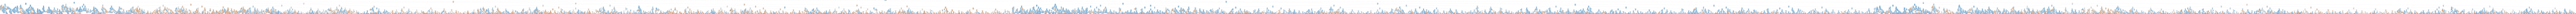

In [62]:
y = data['CLASIFFICATION_FINAL']
x = data.drop(columns = ['CLASIFFICATION_FINAL'])

tree = sk.tree.DecisionTreeClassifier(criterion='entropy',max_depth=14)
tree = tree.fit(x, y)

tree_data = sk.tree.export_graphviz(tree, feature_names=x.columns, class_names=['1','2'], filled=True, out_file=None)
tree_graph = pydotplus.graph_from_dot_data(tree_data)
Image(tree_graph.create_png())

As seen, the decision tree is way too large to be practical due to the attribute count. It is for this reason that correlational analysis can be used to remove redundant attributes (that give almost identical information). For this example, a threshold of 0.85 was used as the basis of relevency.

In [39]:
corr_matrix = data.corr(numeric_only=True)
m = (corr_matrix.mask(np.eye(len(corr_matrix), dtype=bool)).abs() > 0.85).any()
corr_matrix.loc[m,m]

COPD    ASTHMA   INMSUPR  HIPERTENSION  CARDIOVASCULAR  \
COPD            1.000000  0.911688  0.858194      0.857028        0.882934   
ASTHMA          0.911688  1.000000  0.874525      0.865876        0.893722   
INMSUPR         0.858194  0.874525  1.000000      0.830283        0.859677   
HIPERTENSION    0.857028  0.865876  0.830283      1.000000        0.863880   
CARDIOVASCULAR  0.882934  0.893722  0.859677      0.863880        1.000000   
RENAL_CHRONIC   0.885519  0.896713  0.858049      0.861949        0.914938   
TOBACCO         0.838574  0.847706  0.812479      0.818369        0.860737   

                RENAL_CHRONIC   TOBACCO  
COPD                 0.885519  0.838574  
ASTHMA               0.896713  0.847706  
INMSUPR              0.858049  0.812479  
HIPERTENSION         0.861949  0.818369  
CARDIOVASCULAR       0.914938  0.860737  
RENAL_CHRONIC        1.000000  0.870441  
TOBACCO              0.870441  1.000000

In [50]:
for index, row in (corr_matrix.loc[m,m]).iterrows():
    print(np.mean(row))

0.8905623569526172
0.898604307203226
0.8704580923787805
0.8710549198441478
0.8965553314260567
0.8982299173995274
0.8640436549124211


RENAL_CHRONIC -> COPD, ASTHMA, INMSUPR, HIPERTENSION, CARDIOVASCULAR, TOBACCO

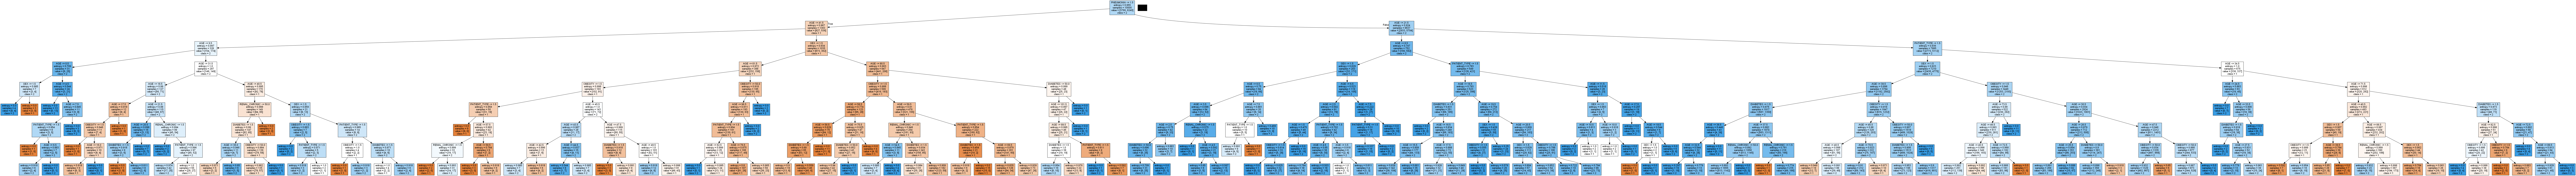

In [60]:
sampledata = data.sample(n=10000,replace=True)
y = sampledata['CLASIFFICATION_FINAL']
x = sampledata.drop(columns = ['CLASIFFICATION_FINAL','COPD','ASTHMA','INMSUPR','HIPERTENSION','CARDIOVASCULAR','TOBACCO'])

tree = sk.tree.DecisionTreeClassifier(criterion='entropy',max_depth=8)
tree = tree.fit(x, y)

tree_data = sk.tree.export_graphviz(tree, feature_names=x.columns, class_names=['1','2'], filled=True, out_file=None)
tree_graph = pydotplus.graph_from_dot_data(tree_data)
Image(tree_graph.create_png())

As is evident, this method is still garbage, so on to logistic regression